# Resampling and Interpolation example

## Only for Google Colab users:

In [ ]:
%pip install --upgrade ipympl speasy

In [ ]:
try:
    from google.colab import output

    output.enable_custom_widget_manager()
except:
    print("Not running inside Google Collab")

## For all users:

In [1]:
import speasy as spz
from speasy.signal.resampling import interpolate
import numpy as np
%matplotlib widget
mms1_products = spz.inventories.tree.cda.MMS.MMS1
# Use this instead if you are not using jupyterlab yet
#%matplotlib notebook
import matplotlib.pyplot as plt

## let's get some data with different time resolutions

In [2]:
b, Tperp, Tpara = spz.get_data(
        [
            mms1_products.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gsm_srvy_l2,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_tempperp_fast,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_temppara_fast
        ],
        '2017-01-01T02:00:00',
        '2017-01-01T02:00:15'
    )

In [3]:
np.diff(b.time)[:3], np.diff(Tperp.time), np.diff(Tpara.time)

(array([62500852, 62500852, 62500852], dtype='timedelta64[ns]'),
 array([4500024000, 4500029000, 4500024000], dtype='timedelta64[ns]'),
 array([4500024000, 4500029000, 4500024000], dtype='timedelta64[ns]'))

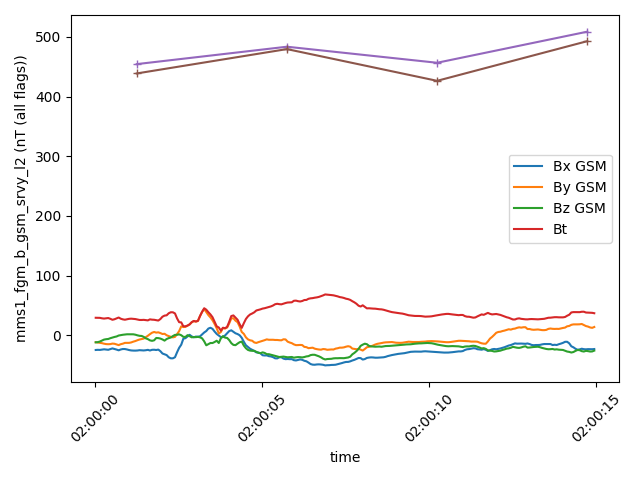

In [4]:
plt.figure()
ax = b.plot()
plt.plot(Tperp.time, Tperp.values, marker='+')
plt.plot(Tpara.time, Tpara.values, marker='+')
plt.tight_layout()

## Now we can interpolate the data to the magnetic field time resolution

The interpolate function will interpolate the data to the time of the first argument.

In [5]:
Tperp_interp, Tpara_interp = interpolate(b, [Tperp, Tpara])

In [6]:
b.time[:2], Tperp_interp.time[:2], Tpara_interp.time[:2]

(array(['2017-01-01T02:00:00.011774444', '2017-01-01T02:00:00.074275296'],
       dtype='datetime64[ns]'),
 array(['2017-01-01T02:00:00.011774444', '2017-01-01T02:00:00.074275296'],
       dtype='datetime64[ns]'),
 array(['2017-01-01T02:00:00.011774444', '2017-01-01T02:00:00.074275296'],
       dtype='datetime64[ns]'))

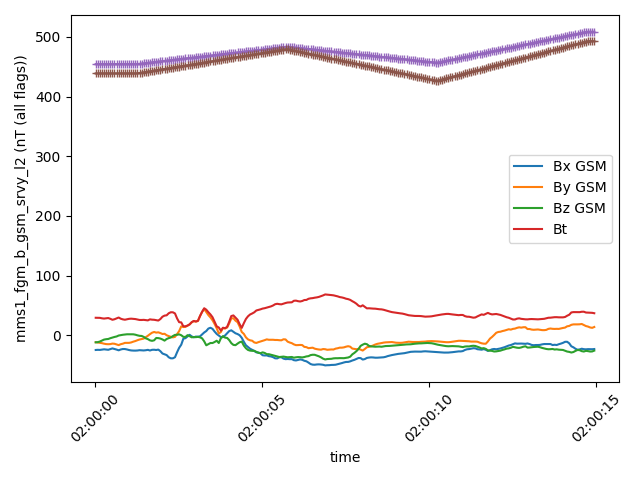

In [7]:
plt.figure()
ax = b.plot()
plt.plot(Tperp_interp.time, Tperp_interp.values, marker='+')
plt.plot(Tpara_interp.time, Tpara_interp.values, marker='+')
plt.tight_layout()